# PROJECT : SMS SPAM-HAM CLASSIFICATION

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('SMS_dataset.csv',encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### Exploratory Data Analysis:

### BASIC INFORMATION OF DATASET

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### CHECK NULL VALUES

In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### DROPING NULL VALUES

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### ENCODING

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
od=OrdinalEncoder()
od.fit_transform(df[['v1','v2']])

array([[0.000e+00, 1.079e+03],
       [0.000e+00, 3.101e+03],
       [1.000e+00, 1.000e+03],
       ...,
       [0.000e+00, 3.286e+03],
       [0.000e+00, 3.901e+03],
       [0.000e+00, 3.409e+03]])

In [11]:
cat_col=df.select_dtypes(object).columns

In [12]:
cat_col

Index(['v1', 'v2'], dtype='object')

In [13]:
df[cat_col]=od.fit_transform(df[cat_col])

In [14]:
df

,v1,v2
0,0.0,1079.0
1,0.0,3101.0
2,1.0,1000.0
3,0.0,4088.0
4,0.0,2757.0
...,...,...
5567,1.0,3992.0
5568,0.0,4560.0
5569,0.0,3286.0
5570,0.0,3901.0


### SEPARATING INTO FEATURES AND TARGET COLUMNS

In [15]:
x=df[['v2']]
y=df['v1']

### UNIVARIATE AND BIVARIATE ANALYSIS OF DATASET

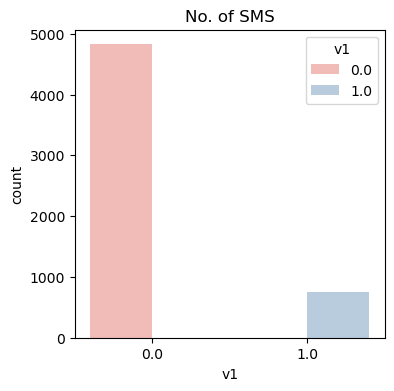

"The univariate graph, Countplot indicates that the majority of SMS are in this dataset is Ham."


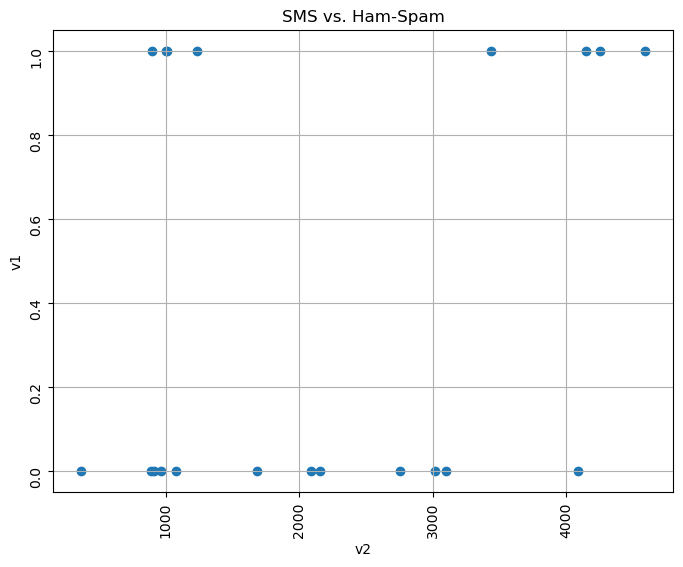

"The Bivariate graph, Scatter plot represents that the distribution of sms msg and spam or non spam observation. which is required for analyze to develop a accurate model."


In [60]:
plt.figure(figsize = (4,4))
sns.countplot(x ="v1", data = df, hue ="v1", palette ="Pastel1")
plt.title("No. of SMS")
plt.show()

print('"The univariate graph, Countplot indicates that the majority of SMS are in this dataset is Ham."')

plt.figure(figsize=(8, 6))
plt.scatter(x=df['v2'][0:20], y=df['v1'][0:20])
plt.title('SMS vs. Ham-Spam')
plt.xlabel('v2')
plt.ylabel('v1')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.grid()
plt.show()

print('"The Bivariate graph, Scatter plot represents that the distribution of sms msg and spam or non spam observation. which is required for analyze to develop a accurate model."')

### Spliting the data into training and testing

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

### 1 - Predicting by using Logistics Regression

In [18]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [19]:
from sklearn.metrics import classification_report, accuracy_score

In [20]:
#Evaluating model

cr=classification_report(ytest,ypred)
print(cr)
ac = accuracy_score(ytest,ypred)
print("Accuracy score : ",ac)

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1454
         1.0       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672

Accuracy score :  0.8696172248803827


#### We have achieved an Average Accuracy of 87 % which is almost good. Lets see, if we can increase this accuracy by hyper tuning.

### HPT

In [21]:
logreg=LogisticRegression(solver='liblinear')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [22]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1454
         1.0       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672



#### By using liblinear we get Accuracy of 87%

In [23]:
logreg=LogisticRegression(solver='saga')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [24]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1454
         1.0       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672



#### By using Saga solver we get Accuracy of 87%

In [25]:
logreg=LogisticRegression(solver='sag')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [26]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1454
         1.0       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672



#### By using Sag solver we get Accuracy of 87%

### 2 - Predicting by using Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier()

In [29]:
def mymodel(model):
 model.fit(xtrain,ytrain)
 ypred = model.predict(xtest)
 print(accuracy_score(ytest,ypred))
 print(classification_report(ytest,ypred))
 
 return model

In [30]:
mymodel(dt)

0.9132775119617225
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1454
         1.0       0.67      0.65      0.66       218

    accuracy                           0.91      1672
   macro avg       0.81      0.80      0.81      1672
weighted avg       0.91      0.91      0.91      1672



DecisionTreeClassifier()

#### By using Decision Tree, we get accuracy of 91% which is good but lets check whether we get more accurcy by hyper tunning.

In [31]:
from sklearn import tree

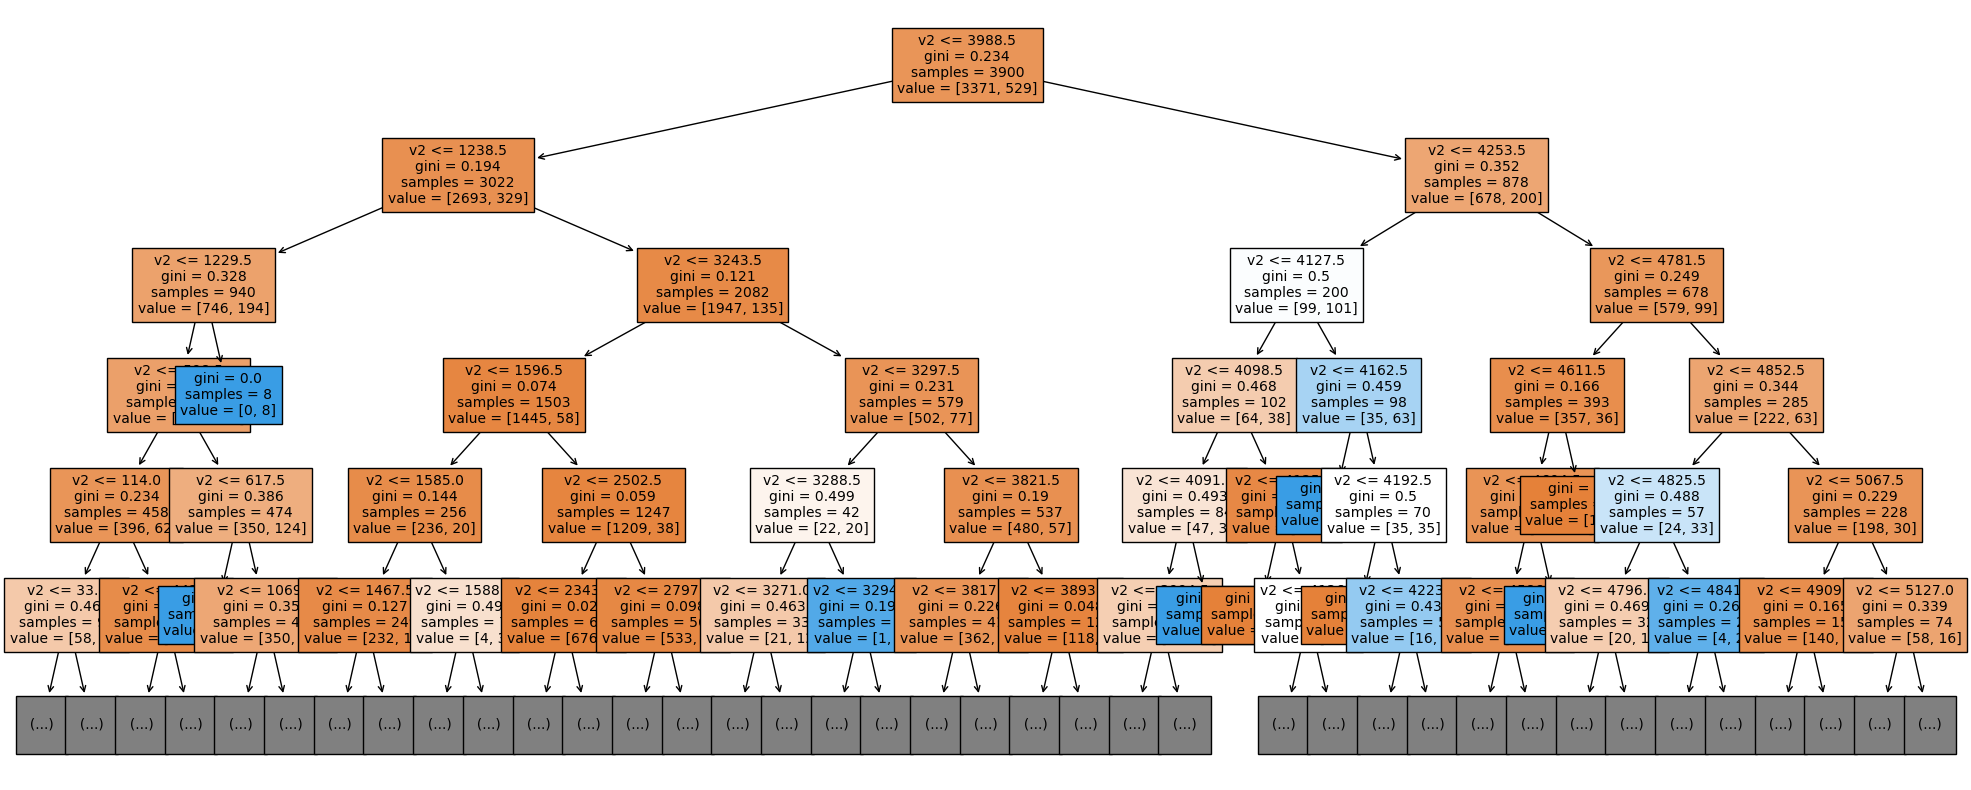

In [32]:
fig,ax = plt.subplots(figsize = (25,10))
chart = tree.plot_tree(dt, max_depth =5, feature_names = x.columns, filled = True, fontsize=10)
plt.savefig("DecisionTree.jpg")

In [33]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :1.0 
 test score : 0.9132775119617225


#### Train acc is high and Test acc is low (Low bias high varience)

### HPT

#### i - max_depth

In [34]:
for i in range(20,35):
 dt1 = DecisionTreeClassifier(max_depth = i)
 dt1.fit(xtrain,ytrain)
 ypred = dt1.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 20 accuracy : 0.9132775119617225
max_depth = 21 accuracy : 0.9132775119617225
max_depth = 22 accuracy : 0.9132775119617225
max_depth = 23 accuracy : 0.9132775119617225
max_depth = 24 accuracy : 0.9132775119617225
max_depth = 25 accuracy : 0.9132775119617225
max_depth = 26 accuracy : 0.9132775119617225
max_depth = 27 accuracy : 0.9132775119617225
max_depth = 28 accuracy : 0.9132775119617225
max_depth = 29 accuracy : 0.9132775119617225
max_depth = 30 accuracy : 0.9132775119617225
max_depth = 31 accuracy : 0.9132775119617225
max_depth = 32 accuracy : 0.9132775119617225
max_depth = 33 accuracy : 0.9132775119617225
max_depth = 34 accuracy : 0.9132775119617225


In [35]:
dt2 = DecisionTreeClassifier(max_depth = 24)
mymodel(dt2)

0.9132775119617225
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1454
         1.0       0.67      0.65      0.66       218

    accuracy                           0.91      1672
   macro avg       0.81      0.80      0.81      1672
weighted avg       0.91      0.91      0.91      1672



DecisionTreeClassifier(max_depth=24)

In [36]:
train = dt2.score(xtrain,ytrain)
test = dt2.score(xtest,ytest)
print(f"train score :{train} \ntest score : {test}")

train score :1.0 
test score : 0.9132775119617225


#### By using Decision Tree Max Depth function, we achive the accuracy of 91%

#### ii - min_samples_split

In [37]:
for i in range(90,110):
 dt3 = DecisionTreeClassifier(min_samples_split = i)
 dt3.fit(xtrain,ytrain)
 ypred = dt3.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"min_samples_split = {i} accuracy : {ac}")

min_samples_split = 90 accuracy : 0.8833732057416268
min_samples_split = 91 accuracy : 0.8833732057416268
min_samples_split = 92 accuracy : 0.8833732057416268
min_samples_split = 93 accuracy : 0.8833732057416268
min_samples_split = 94 accuracy : 0.8845693779904307
min_samples_split = 95 accuracy : 0.8845693779904307
min_samples_split = 96 accuracy : 0.8845693779904307
min_samples_split = 97 accuracy : 0.8845693779904307
min_samples_split = 98 accuracy : 0.8845693779904307
min_samples_split = 99 accuracy : 0.8803827751196173
min_samples_split = 100 accuracy : 0.8803827751196173
min_samples_split = 101 accuracy : 0.8744019138755981
min_samples_split = 102 accuracy : 0.8744019138755981
min_samples_split = 103 accuracy : 0.8744019138755981
min_samples_split = 104 accuracy : 0.8744019138755981
min_samples_split = 105 accuracy : 0.8744019138755981
min_samples_split = 106 accuracy : 0.8744019138755981
min_samples_split = 107 accuracy : 0.8744019138755981
min_samples_split = 108 accuracy : 0.8

In [38]:
dt4 = DecisionTreeClassifier(min_samples_split = 92)
mymodel(dt4)

0.8833732057416268
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94      1454
         1.0       0.66      0.22      0.33       218

    accuracy                           0.88      1672
   macro avg       0.78      0.60      0.63      1672
weighted avg       0.86      0.88      0.86      1672



DecisionTreeClassifier(min_samples_split=92)

In [39]:
train = dt4.score(xtrain,ytrain)
test = dt4.score(xtest,ytest)
print(f"train score :{train} \ntest score : {test}")

train score :0.892051282051282 
test score : 0.8833732057416268


#### By using Decision Tree Min Sample Split function, we achive the accuracy of 88%

#### iii - min_samples_leaf

In [55]:
for i in range(30,50):
 dt5 = DecisionTreeClassifier(min_samples_leaf = i)
 dt5.fit(xtrain,ytrain)
 ypred = dt5.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"min_samples_leaf = {i} accuracy : {ac}")

min_samples_leaf = 30 accuracy : 0.8714114832535885
min_samples_leaf = 31 accuracy : 0.8660287081339713
min_samples_leaf = 32 accuracy : 0.8642344497607656
min_samples_leaf = 33 accuracy : 0.8642344497607656
min_samples_leaf = 34 accuracy : 0.8732057416267942
min_samples_leaf = 35 accuracy : 0.8732057416267942
min_samples_leaf = 36 accuracy : 0.8732057416267942
min_samples_leaf = 37 accuracy : 0.8732057416267942
min_samples_leaf = 38 accuracy : 0.8732057416267942
min_samples_leaf = 39 accuracy : 0.8732057416267942
min_samples_leaf = 40 accuracy : 0.8732057416267942
min_samples_leaf = 41 accuracy : 0.8732057416267942
min_samples_leaf = 42 accuracy : 0.8732057416267942
min_samples_leaf = 43 accuracy : 0.8732057416267942
min_samples_leaf = 44 accuracy : 0.8732057416267942
min_samples_leaf = 45 accuracy : 0.8732057416267942
min_samples_leaf = 46 accuracy : 0.8732057416267942
min_samples_leaf = 47 accuracy : 0.8732057416267942
min_samples_leaf = 48 accuracy : 0.8732057416267942
min_samples_

In [41]:
dt6 = DecisionTreeClassifier(min_samples_leaf = 44)
mymodel(dt6)

0.8732057416267942
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      1454
         1.0       0.52      0.30      0.38       218

    accuracy                           0.87      1672
   macro avg       0.71      0.63      0.66      1672
weighted avg       0.85      0.87      0.86      1672



DecisionTreeClassifier(min_samples_leaf=44)

In [42]:
train = dt6.score(xtrain,ytrain)
test = dt6.score(xtest,ytest)
print(f"train score :{train} \ntest score : {test}")

train score :0.8782051282051282 
test score : 0.8732057416267942


#### By using Decision Tree min_samples_leaf function we achive the accuracy of 87%

### 3 - Predicting by using KNN Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) # by default n_neighbors = 5
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [44]:
#evaluate the Model

from sklearn.metrics import accuracy_score
ac = accuracy_score(ytest,ypred)
print(ac)

0.9078947368421053


#### By using KNN CLASSIFIER, we get 90% accuracy which is moderately good.

### 4 - Predicting by using Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(xtrain,ytrain)
ypred = rc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1454
         1.0       0.67      0.65      0.66       218

    accuracy                           0.91      1672
   macro avg       0.81      0.80      0.81      1672
weighted avg       0.91      0.91      0.91      1672



#### By using Random Forest, we get 91% of accuracy.

### 5 - Predicting by using Encemble Learning

### A) - BOOSTING

### i - Adaboost Classifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred = ada.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1454
         1.0       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.76      0.87      0.81      1672



#### By using AdaBoost Classifier, we get 87% of accuracy.

### ii - Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred = gbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      1454
         1.0       0.82      0.23      0.36       218

    accuracy                           0.89      1672
   macro avg       0.86      0.61      0.65      1672
weighted avg       0.89      0.89      0.87      1672



#### By using Gradient Boosting algorithm we get 89% of accuracy.

### iii - XG Boosting

In [48]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred = xgb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      1454
         1.0       0.58      0.28      0.38       218

    accuracy                           0.88      1672
   macro avg       0.74      0.63      0.66      1672
weighted avg       0.86      0.88      0.86      1672



#### By using XG Boost algorithm, we get 88% of accuracy.

### B) - BAGGING

In [50]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1454
         1.0       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672



#### By using Bagging Classifier on Logostic Regression, we get 87% of accuracy which is not good for prediction.¶

In [51]:
bg = BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1454
         1.0       0.69      0.61      0.65       218

    accuracy                           0.91      1672
   macro avg       0.82      0.79      0.80      1672
weighted avg       0.91      0.91      0.91      1672



#### By using Bagging Classifier on Decision Tree we get 91% of accuracy.

In [52]:
models =[]
models.append(("lr",LogisticRegression()))
models.append(("dt",DecisionTreeClassifier()))

In [53]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models) # estimators --> model name
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1454
         1.0       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672



In [54]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = models,voting='soft') # estimators --> model na
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1454
         1.0       0.67      0.65      0.66       218

    accuracy                           0.91      1672
   macro avg       0.81      0.80      0.81      1672
weighted avg       0.91      0.91      0.91      1672



#### By using Voting Classifier, we get 87% (hard voting) and 91% (soft voting) of of accuracy.

### 6 - Predicting by using Naive Bayes classifier

In [71]:
from sklearn.naive_bayes import GaussianNB

In [79]:
nb_classifier = GaussianNB()
nb_classifier.fit(xtrain, ytrain)
ypred = nb_classifier.predict(xtest)

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(ytest, ypred)
conf_matrix = confusion_matrix(ytest, ypred)
classification_rep = classification_report(ytest, ypred)

In [78]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8696172248803827

Confusion Matrix:
 [[1454    0]
 [ 218    0]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1454
         1.0       0.00      0.00      0.00       218

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.47      1672
weighted avg       0.76      0.87      0.81      1672



#### By using Naive Bayes Classifier, we get 87% accuracy.

### CONCLUSION

### Based on the above all Algorithm of accuracy scores, we should go ahead with Decsion tree , Logistics Regression or Random Forest.